# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# Paramaters for query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = api_key

# Build partial query URL - without city
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# set up lists to hold reponse info
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_name = []

# set up a counter to print out
counter = 0

# print the start of the API call
print("Beginning Data Retrieval")
print("------------------------")

# Loop through the list of cities and retrieve data on cloudiness, country, 
# date, humidity, lat, lng , Max Temperature, and Wind Speed
for city in cities:
    try:
        counter += 1
        print(f"Processing Record {counter} | {city}")
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
    except:
        print("-----Error: Data not found...Skip-----")
        
print("------------------------")        
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------
Processing Record 1 | yellowknife
Processing Record 2 | jamestown
Processing Record 3 | punta arenas
Processing Record 4 | hermanus
Processing Record 5 | arraial do cabo
Processing Record 6 | constitucion
Processing Record 7 | morondava
Processing Record 8 | victoria
Processing Record 9 | salalah
Processing Record 10 | geraldton
Processing Record 11 | mataura
Processing Record 12 | palabuhanratu
-----Error: Data not found...Skip-----
Processing Record 13 | bredasdorp
Processing Record 14 | spirit river
Processing Record 15 | ushuaia
Processing Record 16 | sao joao da barra
Processing Record 17 | linhares
Processing Record 18 | nome
Processing Record 19 | marawi
Processing Record 20 | labutta
-----Error: Data not found...Skip-----
Processing Record 21 | kirakira
Processing Record 22 | mar del plata
Processing Record 23 | rikitea
Processing Record 24 | rundu
Processing Record 25 | riyadh
Processing Record 26 | ballina
Processing Record 27

Processing Record 218 | njombe
Processing Record 219 | san patricio
Processing Record 220 | chikoy
-----Error: Data not found...Skip-----
Processing Record 221 | najran
Processing Record 222 | nikolskoye
Processing Record 223 | sistranda
Processing Record 224 | faya
Processing Record 225 | faanui
Processing Record 226 | tiksi
Processing Record 227 | dwarka
Processing Record 228 | matsanga
-----Error: Data not found...Skip-----
Processing Record 229 | puerto baquerizo moreno
Processing Record 230 | saint anthony
Processing Record 231 | dunedin
Processing Record 232 | bukachacha
Processing Record 233 | zhezkazgan
Processing Record 234 | padang
Processing Record 235 | ginda
Processing Record 236 | ibipeba
Processing Record 237 | aklavik
Processing Record 238 | riohacha
Processing Record 239 | okha
Processing Record 240 | ponta delgada
Processing Record 241 | shunyi
Processing Record 242 | senigallia
Processing Record 243 | valdemarpils
Processing Record 244 | basco
Processing Record 245 |

Processing Record 441 | sayat
Processing Record 442 | dujuma
-----Error: Data not found...Skip-----
Processing Record 443 | udachnyy
Processing Record 444 | mayo
Processing Record 445 | wanaka
Processing Record 446 | adeje
Processing Record 447 | doha
Processing Record 448 | kizema
Processing Record 449 | luderitz
Processing Record 450 | jacksonville
Processing Record 451 | batagay-alyta
Processing Record 452 | huarmey
Processing Record 453 | rocha
Processing Record 454 | pontes e lacerda
Processing Record 455 | araguaina
Processing Record 456 | doctor pedro p. pena
-----Error: Data not found...Skip-----
Processing Record 457 | cururupu
Processing Record 458 | ambilobe
Processing Record 459 | eureka
Processing Record 460 | iznik
Processing Record 461 | guaymas
Processing Record 462 | srednekolymsk
Processing Record 463 | kualakapuas
Processing Record 464 | corbelia
Processing Record 465 | marsaxlokk
Processing Record 466 | santa cruz del sur
Processing Record 467 | graaff-reinet
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Create a dictionary from the list above to be able to convert into dataframe(df)
weather_dict = {
    'City':city_name, 
    'Cloudiness':cloudiness, 
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Latitude':lat,
    'Longitude':lng,
    'Max Temp':max_temp,
    'Wind Speed':wind_speed
}


In [26]:
# Convert my dictionary into a dataframe(df)
weather_df = pd.DataFrame(weather_dict)

# Output File (CSV)
weather_df.to_csv("Weather_data.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Yellowknife,90,CA,1551762095,78,62.45,-114.38,12.20,19.46
1,Jamestown,0,AU,1551762664,91,-33.21,138.60,72.46,10.22
2,Punta Arenas,75,CL,1551762196,86,-53.16,-70.91,39.20,23.04
3,Hermanus,48,ZA,1551762111,87,-34.42,19.24,59.00,3.51
4,Arraial do Cabo,8,BR,1551762271,92,-22.97,-42.02,79.16,11.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

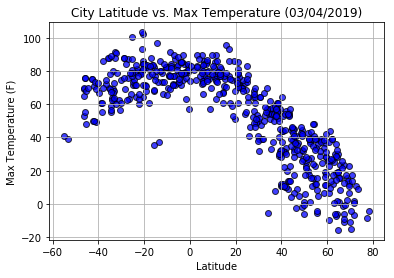

In [27]:
# Scatter plot for Latitude vs. Max Temperature Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Max Temp'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

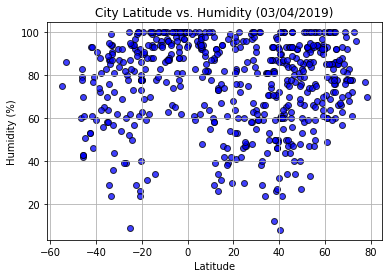

In [28]:
# Scatter plot for Latitude vs. Humidity Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Humidity'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

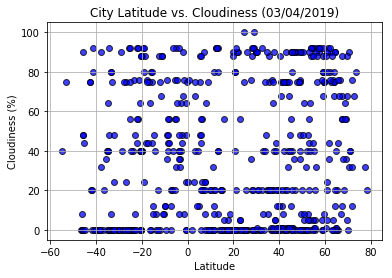

In [31]:
# Scatter plot for Latitude vs. Cloudiness Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Cloudiness'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

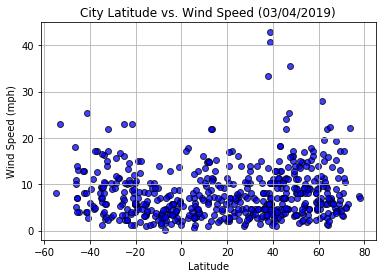

In [32]:
# Scatter plot for Latitude vs. Wind Speed Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Wind Speed'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Wind.png")

# Show plot
plt.show()